<a href="https://colab.research.google.com/github/futurebygb/AIFuturePlanningtemplate/blob/main/04-Data-Wrangling/Guided-Project/GP04-Customer-Data-Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Project 4: Customer Data Cleanup
## Chapter 4: Data Wrangling and Preparation

**AI Thinking: A Hands-On Introduction to Artificial Intelligence**

---

### Scenario

You've just been hired as a data assistant at **TechFix Hialeah**, a small laptop and computer repair shop. The owner, Eddie, has been tracking repair orders in a spreadsheet, but the data is a mess. Before the shop can analyze trends—like which services are most popular or which technician gets the best ratings—the data needs to be cleaned up.

Your job: **Load, explore, and clean this dataset using pandas.**

---

### What You'll Practice
- Loading a CSV file into pandas
- Exploring data with `.shape`, `.info()`, `.describe()`, `.head()`
- Finding and handling missing values
- Removing duplicate rows
- Standardizing messy text
- Filtering out bad data
- Basic analysis on clean data

---
## Part 1: Setup and Load the Data

First, let's import pandas and load our dataset.

In [1]:
# Import pandas
import pandas as pd

# Load the dataset
df = pd.read_csv('tech_repair_orders.csv')

# Quick look at the first few rows
df.head()

,order_id,customer_name,device_brand,service_type,price,technician,status,customer_rating,days_to_complete
0,4055,Marco Ramirez,HP,Virus Removal,NaN,Eddie,Picked Up,5.0,3
1,4016,Diego Perez,Asus,Hard Drive Replacement,-45.00,Yami,Picked Up,5.0,3
2,4007,Sofia Martinez,Acer,Screen Replacement,NaN,Yami,Completed,4.0,7
3,4024,Andres Reyes,Asus,Fan Cleaning,132.07,Eddie,In Progress,2.0,3
4,4006,Gabriela Flores,Asus,Battery Replacement,98.03,Jorge,Waiting for Parts,NaN,2


---
## Part 2: Explore the Data

Before we clean anything, let's understand what we're working with. Think of this like a mechanic inspecting a car before starting repairs — you need to know what's wrong first.

In [2]:
# How big is our dataset?
print("Dataset shape:", df.shape)
print(f"That's {df.shape[0]} rows and {df.shape[1]} columns")

Dataset shape: (63, 9)
That's 63 rows and 9 columns


In [3]:
# What columns do we have and what types are they?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          63 non-null     int64  
 1   customer_name     59 non-null     object 
 2   device_brand      63 non-null     object 
 3   service_type      63 non-null     object 
 4   price             58 non-null     float64
 5   technician        61 non-null     object 
 6   status            63 non-null     object 
 7   customer_rating   55 non-null     float64
 8   days_to_complete  63 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.6+ KB


In [4]:
# Statistical summary of numerical columns
df.describe()

,order_id,price,customer_rating,days_to_complete
count,63.000000,58.000000,55.000000,63.000000
mean,4029.301587,144.257931,3.690909,3.857143
std,17.384304,73.295002,1.561964,2.139167
min,4000.000000,-120.500000,0.000000,-2.000000
25%,4014.500000,95.105000,3.000000,2.000000
50%,4029.000000,152.440000,4.000000,4.000000
75%,4044.500000,202.972500,5.000000,6.000000
max,4059.000000,244.880000,7.000000,7.000000


### 🤔 What do you notice?

Look at the output from `.info()` and `.describe()`. Can you spot any problems?

- Do all columns have the same count of non-null values?
- Are the min/max values for price and rating reasonable?
- Anything else that looks off?

I noticed anomalies in customer rating, which normally has 1 as its lowest value



---



---



---
## Part 3: Find Missing Values

Let's get a clear picture of what's missing in our data.

In [5]:
# Count missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
order_id            0
customer_name       4
device_brand        0
service_type        0
price               5
technician          2
status              0
customer_rating     8
days_to_complete    0
dtype: int64


In [6]:
# What percentage of each column is missing?
missing_pct = (df.isnull().sum() / len(df) * 100).round(1)
print("\nMissing value percentages:")
print(missing_pct)


Missing value percentages:
order_id             0.0
customer_name        6.3
device_brand         0.0
service_type         0.0
price                7.9
technician           3.2
status               0.0
customer_rating     12.7
days_to_complete     0.0
dtype: float64


N.B. 12.7% of customer rating is missing.

---
## Part 4: Handle Missing Values

Now let's decide how to handle each missing column:

- **customer_name**: Fill with `'Unknown'` (we still want the order data)
- **price**: Fill with the **median** price (better than mean for skewed data)
- **technician**: Fill with `'Unknown'`
- **customer_rating**: Fill with the **median** rating (not everyone rates, this is common)

In [7]:
# Fill missing customer names with 'Unknown'
df['customer_name'] = df['customer_name'].fillna('Unknown')

# Fill missing prices with the median price
median_price = df['price'].median()
print(f"Median price: ${median_price:.2f}")
df['price'] = df['price'].fillna(median_price)

# Fill missing technician names with 'Unknown'
df['technician'] = df['technician'].fillna('Unknown')

# Fill missing ratings with the median rating
median_rating = df['customer_rating'].median()
print(f"Median rating: {median_rating}")
df['customer_rating'] = df['customer_rating'].fillna(median_rating)

Median price: $152.44
Median rating: 4.0


In [8]:
df.head(20)

,order_id,customer_name,device_brand,service_type,price,technician,status,customer_rating,days_to_complete
0,4055,Marco Ramirez,HP,Virus Removal,152.44,Eddie,Picked Up,5.0,3
1,4016,Diego Perez,Asus,Hard Drive Replacement,-45.00,Yami,Picked Up,5.0,3
2,4007,Sofia Martinez,Acer,Screen Replacement,152.44,Yami,Completed,4.0,7
3,4024,Andres Reyes,Asus,Fan Cleaning,132.07,Eddie,In Progress,2.0,3
4,4006,Gabriela Flores,Asus,Battery Replacement,98.03,Jorge,Waiting for Parts,4.0,2
5,4031,Unknown,Apple,Data Recovery,88.71,Eddie,Picked Up,5.0,1
6,4036,Carlos Rodriguez,Apple,Charging Port Repair,143.11,Jorge,In Progress,1.0,5
7,4014,Miguel Santos,Lenovo,Software Install,152.44,Yami,Picked Up,5.0,2
8,4045,Roberto Hernandez,Acer,Battery Replacement,153.94,Yami,Waiting for Parts,3.0,2
9,4010,Diego Perez,Acer,Software Install,87.63,Unknown,Picked Up,5.0,6


In [9]:
# Verify: any missing values left?
print("Missing values after cleanup:")
print(df.isnull().sum())

Missing values after cleanup:
order_id            0
customer_name       0
device_brand        0
service_type        0
price               0
technician          0
status              0
customer_rating     0
days_to_complete    0
dtype: int64


N.B. After cleanup we should see no missing values, as at above. This is necessary for confirmation.

💡 **Key Insight**: We used the **median** instead of the **mean** for price and rating. Why? The median isn't affected by extreme values (outliers). If one repair cost $500 and the rest were around $80, the mean would be pulled way up, but the median stays in the middle.

---
## Part 5: Remove Duplicates

Sometimes the same order gets recorded twice. Let's check.

In [10]:
# How many duplicate rows do we have?
print(f"Duplicate rows found: {df.duplicated().sum()}")
print(f"Rows before removing duplicates: {len(df)}")

# Remove duplicates
df = df.drop_duplicates()

print(f"Rows after removing duplicates: {len(df)}")

Duplicate rows found: 3
Rows before removing duplicates: 63
Rows after removing duplicates: 60


---
## Part 6: Standardize Text

Let's look at how technician names and service types are recorded. You'd expect them to be consistent, but...

In [11]:
# Check unique technician names
print("Technician names (before cleaning):")
print(df['technician'].unique())

Technician names (before cleaning):
['Eddie' 'Yami' 'Jorge' 'Unknown' 'YAMI' ' Jorge' 'eddie' 'EDDIE' 'yami '
 ' eddie ' 'jorge']


N.B. We need to standardize the technician names. As is the current data suggests 11 different technicians based on input errors.

In [12]:
# Check unique service types
print("Service types (before cleaning):")
print(df['service_type'].unique())

Service types (before cleaning):
['Virus Removal' 'Hard Drive Replacement' 'Screen Replacement'
 'Fan Cleaning' 'Battery Replacement' 'Data Recovery'
 'Charging Port Repair' 'Software Install' 'Keyboard Repair'
 ' Data Recovery' 'BATTERY REPLACEMENT' 'SCREEN REPLACEMENT'
 'virus removal ' 'RAM Upgrade' 'screen replacement']


See the problem? "Eddie", "eddie", "EDDIE", and " eddie " are all the same person, but pandas treats them as different values. Same issue with service types.

The fix: **convert everything to lowercase** and **remove extra spaces**.

In [13]:
# Standardize technician names: lowercase + strip whitespace
df['technician'] = df['technician'].str.lower().str.strip()

# Standardize service types: lowercase + strip whitespace
df['service_type'] = df['service_type'].str.lower().str.strip()

# Check the results
print("Technician names (after cleaning):")
print(df['technician'].unique())

print("\nService types (after cleaning):")
print(df['service_type'].unique())

Technician names (after cleaning):
['eddie' 'yami' 'jorge' 'unknown']

Service types (after cleaning):
['virus removal' 'hard drive replacement' 'screen replacement'
 'fan cleaning' 'battery replacement' 'data recovery'
 'charging port repair' 'software install' 'keyboard repair' 'ram upgrade']


N.B. Always standardize your text columns and repeated process EARLY in your process.

Much cleaner! Now "Eddie", "eddie", "EDDIE", and " eddie " are all just "eddie".

🔧 **Pro Tip**: Always standardize text columns early in your cleaning process. This is the #1 cause of "my analysis looks wrong" problems.

---
## Part 7: Filter Out Bad Data

Some values just don't make sense. Let's find and remove them.

In [14]:
# Check for negative prices (shouldn't exist!)
bad_prices = df[df['price'] < 0]
print(f"Orders with negative prices: {len(bad_prices)}")
print(bad_prices[['order_id', 'service_type', 'price']])

Orders with negative prices: 2
    order_id            service_type  price
1       4016  hard drive replacement  -45.0
31      4037         keyboard repair -120.5


Bad prices are values less than zero. This sample is small enough to easily correct.

In [15]:
# Check for ratings outside the 1-5 scale
bad_ratings = df[(df['customer_rating'] < 1) | (df['customer_rating'] > 5)]
print(f"Orders with invalid ratings: {len(bad_ratings)}")
print(bad_ratings[['order_id', 'customer_name', 'customer_rating']])

Orders with invalid ratings: 2
    order_id      customer_name  customer_rating
14      4046      Camila Torres              0.0
32      4021  Roberto Hernandez              7.0


In the above scenario we could fill this in with the median, which is 4.

In [16]:
# Check for negative days to complete
bad_days = df[df['days_to_complete'] < 0]
print(f"Orders with negative days: {len(bad_days)}")
print(bad_days[['order_id', 'service_type', 'days_to_complete']])

Orders with negative days: 1
    order_id     service_type  days_to_complete
15      4050  keyboard repair                -2


Easy fix - just one entry!

In [17]:
# Remove all bad data
print(f"Rows before filtering: {len(df)}")

# Keep only positive prices
df = df[df['price'] > 0]

# Keep only valid ratings (1-5)
df = df[(df['customer_rating'] >= 1) & (df['customer_rating'] <= 5)]

# Keep only positive days to complete
df = df[df['days_to_complete'] > 0]

print(f"Rows after filtering: {len(df)}")

Rows before filtering: 60
Rows after filtering: 55


Ask the boss what is to be done with the rows. These could be replaced instead of filtering them out.

⚠️ **Common Pitfall**: Notice how we used `&` (not `and`) and put each condition in parentheses when combining filters. This is a pandas-specific rule that trips up many beginners!

```python
# WRONG — will cause an error:
# df[df['rating'] >= 1 and df['rating'] <= 5]

# CORRECT:
df[(df['rating'] >= 1) & (df['rating'] <= 5)]
```

---
## Part 8: Verify Our Clean Data

Let's do a final check to make sure everything looks good.

In [18]:
# Final data check
print("=== CLEAN DATA SUMMARY ===")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"\nPrice range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
print(f"Rating range: {df['customer_rating'].min()} - {df['customer_rating'].max()}")
print(f"Days range: {df['days_to_complete'].min()} - {df['days_to_complete'].max()}")

=== CLEAN DATA SUMMARY ===
Rows: 55
Columns: 9
Missing values: 0
Duplicate rows: 0

Price range: $46.65 - $244.88
Rating range: 1.0 - 5.0
Days range: 1 - 7


Now we know that all the datasets now work. We have clean data!

---
## Part 9: Quick Analysis on Clean Data

Now that our data is clean, let's answer some business questions for Eddie!

In [19]:
# What's the average price per service?
print("Average price by service type:")
print(df.groupby('service_type')['price'].mean().round(2).sort_values(ascending=False))

Average price by service type:
service_type
keyboard repair           228.10
ram upgrade               204.08
virus removal             182.20
data recovery             164.87
hard drive replacement    152.52
software install          149.40
charging port repair      148.84
battery replacement       148.21
screen replacement        133.75
fan cleaning              113.90
Name: price, dtype: float64


N.B. sort_values(ascending=False) sorts the data by descending order

In [20]:
# Which technician has the best average rating?
print("Average rating by technician:")
print(df.groupby('technician')['customer_rating'].mean().round(2).sort_values(ascending=False))

Average rating by technician:
technician
unknown    5.00
eddie      3.78
yami       3.71
jorge      3.56
Name: customer_rating, dtype: float64


In [21]:
# What are the most common services?
print("Number of orders by service type:")
print(df['service_type'].value_counts())

Number of orders by service type:
service_type
virus removal             8
hard drive replacement    8
screen replacement        7
battery replacement       7
data recovery             7
software install          6
charging port repair      5
fan cleaning              4
keyboard repair           2
ram upgrade               1
Name: count, dtype: int64


In [22]:
# Which device brand comes in most often?
print("Repairs by device brand:")
print(df['device_brand'].value_counts())

Repairs by device brand:
device_brand
Acer      15
Asus      10
HP         8
Lenovo     8
Dell       8
Apple      6
Name: count, dtype: int64


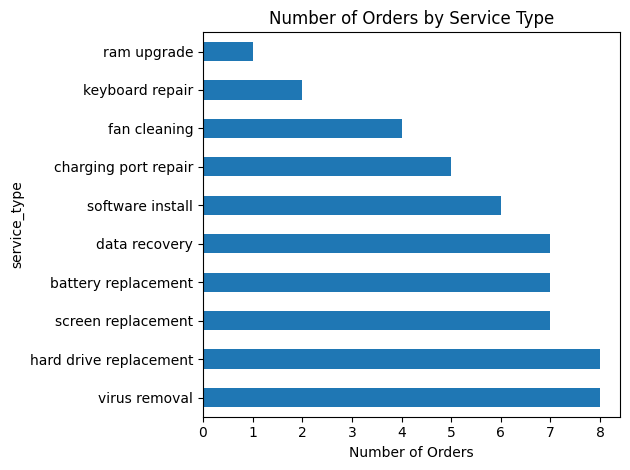

In [23]:
# Quick bar chart: orders by service type
import matplotlib.pyplot as plt

df['service_type'].value_counts().plot(kind='barh')
plt.title('Number of Orders by Service Type')
plt.xlabel('Number of Orders')
plt.tight_layout()
plt.show()

N.B. The library matplotlib.pyplot which enables this graph

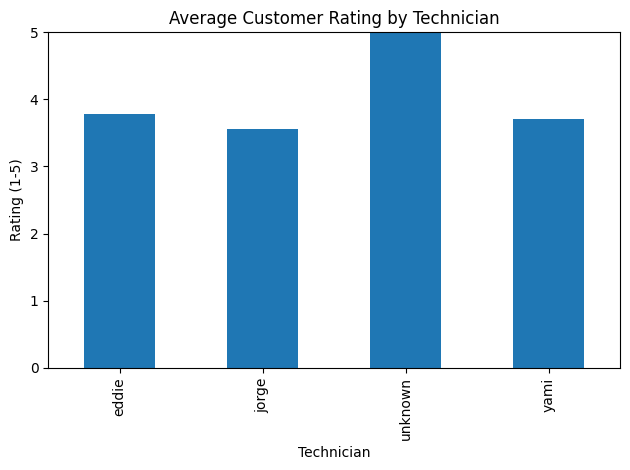

In [24]:
# Quick bar chart: average rating by technician
df.groupby('technician')['customer_rating'].mean().plot(kind='bar')
plt.title('Average Customer Rating by Technician')
plt.ylabel('Rating (1-5)')
plt.xlabel('Technician')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

N.B. Whenever we do analysis, IMMEDIATELY do a code block to present the data visually.

---
## 🎓 What We Did

Let's recap the full data wrangling pipeline we just completed:

1. **Loaded** the data from a CSV file
2. **Explored** with `.shape`, `.info()`, `.describe()`, `.head()`
3. **Found missing values** with `.isnull().sum()`
4. **Filled missing values** with `.fillna()` using median and 'Unknown'
5. **Removed duplicates** with `.drop_duplicates()`
6. **Standardized text** with `.str.lower().str.strip()`
7. **Filtered bad data** by removing negative values and out-of-range ratings
8. **Verified** the clean dataset
9. **Analyzed** the clean data with `.groupby()` and `.value_counts()`

This is the same workflow you'd use on any messy dataset — in school, at work, or in your own projects.

---

**Great work!** 🎉 You just wrangled your first real dataset.